In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from prepare import Prepare
from split_get_scale import SplitGetScale
from scipy.stats import pearsonr
from scipy import stats
pd.options.display.max_columns = 30
α = 0.05

In [2]:
zillow = Prepare().wrangle_zillow()

In [3]:
sgs = SplitGetScale()
train, validate, test = sgs.split(zillow)

### Stat Tests

- pearsonr: home size and log error
- ttest: LA and Ventura and log_error
- pearsonr: tax_amount and log_erro

###### home_size and log error

- HO:home_size and log_error not linear relation.
- H1:home_size and log_error has linear relation.

In [4]:
r, p = pearsonr(x=train.home_size_square_feet, y=train.log_error)
r, p
r, p
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We reject the null hypothesis
1.2939311410195147e-18


###### LA and Ventura and log_error

In [5]:
ventura_sample = train[train.county == 'Ventura'].log_error
los_angeles_sample = train[train.county == 'Los Angeles'].log_error

- H0: LA county log_error equals Ventura county log_error.

- Ha: LA county log_error does not equal Ventura county log_error.

In [8]:
t, p = stats.ttest_ind(ventura_sample, los_angeles_sample, equal_var=False)

t, p
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We fail to reject the null hypothesis
0.9907438540390221


###### tax_amount and log_error

- HO:tax_amount and log_error not linear relation.
- H1:tax_amount and log_error has linear relation.

In [7]:
α = 0.05
r, p = pearsonr(x=train.tax_amount, y=train.log_error)
r, p
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print(p)

We fail to reject the null hypothesis
0.9221442669347352


- checked to see which was more a driving factor of tax_value_dollar

In [ ]:
###### 

In [ ]:

r, p = pearsonr(x=train.lot_size_square_feet, y=train.tax_value_dollar_count)
r, p

In [ ]:

r, p = pearsonr(x=train.home_size_square_feet, y=train.tax_value_dollar_count)
r, p

In [12]:
train.head(1)

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county
13527,11770180,1.0,2,941.0,6037,34012117.0,-118247150.0,6338.0,6.037228e+07,12447,3101,95992,1909,32430.0,72079.0,2016,39649.0,1025.09,6.037228e+13,-0.091213,2017-03-01,Los Angeles


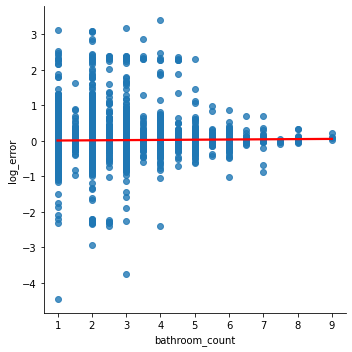

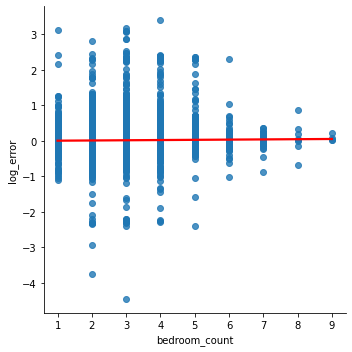

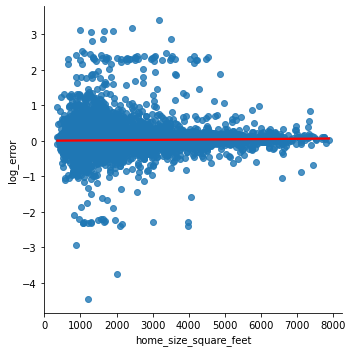

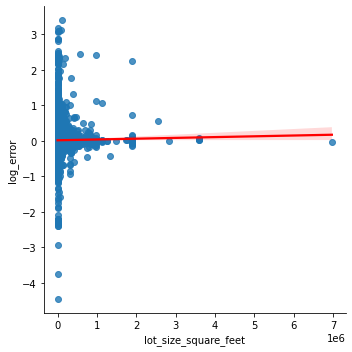

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
col_list = ['parcel_id', 'bathroom_count', 'bedroom_count', 'home_size_square_feet', 'fips', 'latitude', 'longitude', 'lot_size_square_feet', 'raw_census_tract_and_block', 	region_id_city	region_id_county	region_id_zip	year_built	structure_tax_value_price	tax_value_dollar_count	assessment_year	land_tax_value_price	tax_amount	census_tract_and_block	 'transaction_date', 'county']
col_list = ['bathroom_count', 'bedroom_count', 'home_size_square_feet', 'lot_size_square_feet']
for col in col_list:
    sns.lmplot(x=col, y="log_error", data=train, line_kws={'color': 'red'})
    plt.show()